__Import__ 
*   Importieren Sie _fipy_ und benennen Sie das Paket `fp`
*   Fügen Sie zusätzlich
```python
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
```
    hinzu

<!--
import fipy as fp
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
-->

In [1]:
import fipy as fp
import matplotlib
#%matplotlib notebook
%matplotlib ipympl
import matplotlib.pyplot as plt

__Diskretisierung__

*    Definieren Sie die Variable `nx` (Anzahl der Zellen) und setzen Sie diesen Wert auf `4`
*    Das Gebiet hat die Länge $1$
*    Berechnen Sie die Länge einer Zelle `dx`
*    Erstellen Sie ein eindimensionales Netz in _fipy_ mit den Werten `nx` und `dx`

<!--
nx = 4
dx = 1./nx
mesh = fp.Grid1D(nx=nx, dx=dx)
-->

In [2]:
nx = 4
dx = 1./nx
mesh = fp.Grid1D(nx=nx, dx=dx)

*    Geben Sie die Koordinaten des Zentrums der Zellen sowie der Flächen aus

<!--
print(mesh.cellCenters())
print(mesh.faceCenters())
-->

In [3]:
print(mesh.cellCenters())
print(mesh.faceCenters())

[[0.125 0.375 0.625 0.875]]
[[0.   0.25 0.5  0.75 1.  ]]


*    Definieren Sie die Geschwindigkeit `U`, die Diffusionskonstante `Gamma` und die Dichte `rho` zu `0.1`, `0.1` und `1.0`
*    Schreiben Sie eine Funktion `calcPe(U, dx, Gamma)` zur Berechnung der Peclet-Zahl
     *     Verwenden Sie das Attribut `dx` auf der Klasse `Grid1D`
*    Geben Sie das Ergebnis aus

<!--
U = 0.1
Gamma = 0.1
rho = 1.0
def calcPe(U, dx, Gamma):
    return 1. * U * dx / Gamma
print("Pe = %f" % (calcPe(U,mesh.dx, Gamma)) )
-->

In [4]:
U = 0.1
Gamma = 0.1
rho = 1.0
def calcPe(U, dx, Gamma):
    return 1. * U * dx / Gamma
print("Pe = %f" % (calcPe(U,mesh.dx, Gamma)) )

Pe = 0.250000


*    Erstellen Sie eine Zellenvariable `phi` in _fipy_
*    Setzen Sie auf der linken bzw. rechten Seite die Dirichlet Randbedingung `1.0` und `0.0`
*    Diskretisieren Sie $\nabla \cdot (\rho \phi u) - \nabla \cdot (\Gamma \nabla \phi) = 0$ als `eq`
    *    Verwenden Sie eine zentrale Differenz für den Konvektionsterm
*    Lösen Sie das Problem

<!--
phi = fp.CellVariable(name="phi", mesh=mesh, value=0.)
phi.constrain( 1.0, mesh.facesLeft() )
phi.constrain( 0.0, mesh.facesRight() )
eq = rho * fp.CentralDifferenceConvectionTerm(coeff=(U,)) - fp.DiffusionTerm(coeff=Gamma) == 0.
eq.solve( var=phi )
-->

In [5]:
phi = fp.CellVariable(name="phi", mesh=mesh, value=0.)
phi.constrain( 1.0, mesh.facesLeft() )
phi.constrain( 0.0, mesh.facesRight() )
eq = rho * fp.CentralDifferenceConvectionTerm(coeff=(U,)) - fp.DiffusionTerm(coeff=Gamma) == 0.
eq.solve( var=phi )

*    Geben Sie die Lösung auf den Zell- und Flächenmittelpunkten aus

<!--
print(phi.value)
print(phi.arithmeticFaceValue())
-->

In [6]:
print(phi.value)
print(phi.arithmeticFaceValue())

[0.92292481 0.73574221 0.49507887 0.18565458]
[1.         0.82933351 0.61541054 0.34036673 0.        ]


*    Lösen Sie die Gleichung erneut, damit Sie die Systemmatrix und den Vektor der rechten Seite ausgeben können

<!--
eq.cacheMatrix()
eq.cacheRHSvector()
eq.solve(var=phi)
print( eq.matrix )
print( eq.RHSvector )
-->

In [7]:
eq.cacheMatrix()
eq.cacheRHSvector()
eq.solve(var=phi)
print( eq.matrix )
print( eq.RHSvector )

 1.200000  -0.350000      ---        ---    
-0.450000   0.800000  -0.350000      ---    
    ---    -0.450000   0.800000  -0.350000  
    ---        ---    -0.450000   1.200000  
[0.85 0.   0.   0.  ]


__Visualisierung__
*    Erzeugen Sie mit _matplotlib_ einen Graphen 
```python 
    plt.figure(1, figsize=(6,6) )
    plt.clf()
    plt.grid()
```
     * Das erste Argument von `figure()` ist die Nummer des Graphen und das zweite Argument die Größe
     * `clf()` löscht alle Objekte aus dem Graphen (wichtig falls Sie die Zellen erneut ausführen)
     * `grid()` zeigt ein Koordinatengitter

<!--
plt.figure(1, figsize=(6,4) )
plt.clf()
plt.grid()
-->

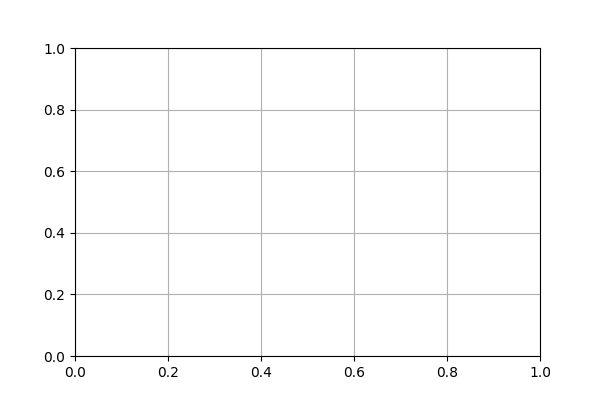

In [8]:
plt.figure(1, figsize=(6,4) )
plt.clf()
plt.grid()

*    Führen Sie die folgenden Befehle aus:
```python
    plt.plot( mesh.faceCenters()[0,:], phi.arithmeticFaceValue()[:], 'ko' )    
    plt.plot( mesh.cellCenters()[0], phi.value, 'ks-' )
    plt.plot(
        [mesh.cellCenters()[0,0], mesh.faceCenters()[0,0]], 
        [phi.value[0], phi.arithmeticFaceValue()[0]], 
        'k-'
    )
    plt.plot( 
        [mesh.cellCenters()[0,-1], mesh.faceCenters()[0,-1]],
        [phi.value[-1], phi.arithmeticFaceValue()[-1]],
        'k-'
    )
```
*    Versuchen Sie [hier](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) den `plot`-Befehl zu verstehen und dokumentieren Sie für sich die Argumente und deren Funktion

<!--
plt.plot( mesh.faceCenters()[0,:], phi.arithmeticFaceValue()[:], 'ko' )    
plt.plot( mesh.cellCenters()[0], phi.value, 'ks-' )
plt.plot(
   [mesh.cellCenters()[0,0], mesh.faceCenters()[0,0]], 
   [phi.value[0], phi.arithmeticFaceValue()[0]], 
   'k-'
)
plt.plot( 
   [mesh.cellCenters()[0,-1], mesh.faceCenters()[0,-1]],
   [phi.value[-1], phi.arithmeticFaceValue()[-1]],
   'k-'
)
-->

In [9]:
plt.plot( mesh.faceCenters()[0,:], phi.arithmeticFaceValue()[:], 'ko' )    
plt.plot( mesh.cellCenters()[0], phi.value, 'ks-' )
plt.plot(
   [mesh.cellCenters()[0,0], mesh.faceCenters()[0,0]], 
   [phi.value[0], phi.arithmeticFaceValue()[0]], 
   'k-'
)
plt.plot( 
   [mesh.cellCenters()[0,-1], mesh.faceCenters()[0,-1]],
   [phi.value[-1], phi.arithmeticFaceValue()[-1]],
   'k-'
)

*    Schreiben Sie eine Funktion `addToPlot()` mit der Graphennummer, dem Rechennetz, der Variablen sowie einer Farbvariablen als Eingang
*    Kopieren Sie den Quelltext aus der Zelle darüber in die Funktion und passen Sie diesen ggf. noch an

<!--
def addToPlot(num, mesh, var, col):
    plt.figure(num)
    plt.plot( mesh.faceCenters()[0,:], var.arithmeticFaceValue()[:], col+'o' )    
    plt.plot( mesh.cellCenters()[0], var.value, col+'s-' )
    plt.plot(
       [mesh.cellCenters()[0,0], mesh.faceCenters()[0,0]], 
       [var.value[0], var.arithmeticFaceValue()[0]], 
       col+'-'
    )
    plt.plot( 
       [mesh.cellCenters()[0,-1], mesh.faceCenters()[0,-1]],
       [var.value[-1], var.arithmeticFaceValue()[-1]],
       col+'-'
    )
-->

In [10]:
def addToPlot(num, mesh, var, col):
    plt.figure(num)
    plt.plot( mesh.faceCenters()[0,:], var.arithmeticFaceValue()[:], col+'o' )    
    plt.plot( mesh.cellCenters()[0], var.value, col+'s-' )
    plt.plot(
       [mesh.cellCenters()[0,0], mesh.faceCenters()[0,0]], 
       [var.value[0], var.arithmeticFaceValue()[0]], 
       col+'-'
    )
    plt.plot( 
       [mesh.cellCenters()[0,-1], mesh.faceCenters()[0,-1]],
       [var.value[-1], var.arithmeticFaceValue()[-1]],
       col+'-'
    )

__Beobachtungen__
*    Diskretisieren Sie die Gleichung von oben als `eq2` erneut mit einer neuen Geschwindigkeit `W=2.0`
*    Stellen Sie sicher, dass _fipy_ die Matrix und den Vektor der rechten Seite behält
*    Berechnen Sie erneut die Peclet-Zahl mit der Funktion von oben
*    Lösen Sie die Gleichung

<!--
W = 2.0
print("Pe = %f" % (calcPe(W, mesh.dx, Gamma)) )

eq2 = rho * fp.CentralDifferenceConvectionTerm(coeff=(W,)) - fp.DiffusionTerm(coeff=Gamma) == 0.
eq2.cacheMatrix()
eq2.cacheRHSvector()
eq2.solve( var=phi )
-->

In [11]:
W = 2.0
print("Pe = %f" % (calcPe(W, mesh.dx, Gamma)) )

eq2 = rho * fp.CentralDifferenceConvectionTerm(coeff=(W,)) - fp.DiffusionTerm(coeff=Gamma) == 0.
eq2.cacheMatrix()
eq2.cacheRHSvector()
eq2.solve( var=phi )

Pe = 5.000000


*    Fügen Sie das Ergebnis durch den Aufruf von `addToPlot()` mit den geeigneten Argumenten zum Graphen oben hinzu
*    Zeichnen sie die neue Kurve rot ein

<!--
addToPlot(1, mesh, phi, 'r')
-->

In [12]:
addToPlot(1, mesh, phi, 'r')

*    Welchen Unterschied haben die beiden Kurven?
*    Sollten Sie die Diskretisierung verändern?
*    Vergleichen Sie beide Systemmatrizen indem Sie diese ausgben. Was beobachten Sie?

<!--
print( eq.matrix )
print( eq2.matrix )
-->

In [13]:
print( eq.matrix )
print( eq2.matrix )

 1.200000  -0.350000      ---        ---    
-0.450000   0.800000  -0.350000      ---    
    ---    -0.450000   0.800000  -0.350000  
    ---        ---    -0.450000   1.200000  
 1.200000   0.600000      ---        ---    
-1.400000   0.800000   0.600000      ---    
    ---    -1.400000   0.800000   0.600000  
    ---        ---    -1.400000   1.200000  


*    Suchen Sie [hier](https://www.ctcms.nist.gov/fipy/documentation/numerical/scheme.html) und [hier](https://www.ctcms.nist.gov/fipy/fipy/generated/fipy.terms.html#) nach einer geeigneten Diskretisierung für den Konvektionsterm
*    Diskretisieren Sie als `eq3` erneut und lösen Sie das Problem
*    Fügen eine neue grüne Kurve hinzu

<!--
eq3 = rho * fp.UpwindConvectionTerm(coeff=(W,)) - fp.DiffusionTerm(coeff=Gamma) == 0.
eq3.cacheMatrix()
eq3.cacheRHSvector()
eq3.solve( var=phi )
addToPlot(1, mesh, phi, 'g')
-->

In [14]:
eq3 = rho * fp.UpwindConvectionTerm(coeff=(W,)) - fp.DiffusionTerm(coeff=Gamma) == 0.
eq3.cacheMatrix()
eq3.cacheRHSvector()
eq3.solve( var=phi )
addToPlot(1, mesh, phi, 'g')

*    Vergleichen Sie alle Systemmatrizen

<!--
print( eq.matrix )
print( eq2.matrix )
print( eq3.matrix )
-->

In [15]:
print( eq.matrix )
print( eq2.matrix )
print( eq3.matrix )

 1.200000  -0.350000      ---        ---    
-0.450000   0.800000  -0.350000      ---    
    ---    -0.450000   0.800000  -0.350000  
    ---        ---    -0.450000   1.200000  
 1.200000   0.600000      ---        ---    
-1.400000   0.800000   0.600000      ---    
    ---    -1.400000   0.800000   0.600000  
    ---        ---    -1.400000   1.200000  
 3.200000  -0.400000      ---        ---    
-2.400000   2.800000  -0.400000      ---    
    ---    -2.400000   2.800000  -0.400000  
    ---        ---    -2.400000   3.200000  
